In [2]:
import numpy as np

import pandas as pd

import math

import matplotlib.pyplot as plt

from scipy.stats import gamma

In [3]:
# выборка

In [4]:
data = [8.432, 6.077, 8.982, 2.897, 5.784, 29.159, 14.564, 9.869, 11.621, 10.405,
     11.589, 15, 8.659, 15.142, 5.345, 7.69, 16.504, 8.742, 2.834, 9.846,
     13.697, 13.167, 6.846, 6.727, 12.614, 3.655, 19.627, 1.572, 11.4, 8.384,
     4.807, 7.897, 13.881, 6.244, 13.188, 12.419, 8.279, 9.37, 7.233, 15.503,
     13.47, 8.511, 10.134, 18.831, 9.422, 3.715, 8.63, 6.99, 10.187, 17.491,
     8.262, 11.019, 13.02, 7.619, 5.1, 7.757, 7.772, 16.063, 8.736, 12.214,
     7.998, 5.651, 5.225, 8.525, 12.935, 9.312, 5.12, 6.146, 19.032, 15.049,
     9.643, 8.633, 4.367, 3.91, 5.957, 6.345, 14.577, 9.878, 13.658, 4.104,
     5.752, 5.693, 15.207, 6.776, 5.055, 4.96, 35.182, 14.399, 13.383, 14.144,
     3.77, 6.394, 11.695, 8.474, 13.196, 7.636, 11.219, 10.463, 6.802, 10.135]

In [5]:
# крайние члены вариационного ряда

In [6]:
min_member = min(data)

max_member = max(data)

print(min_member, max_member)

1.572 35.182


In [7]:
# размах 

In [8]:
selection_range = max_member - min_member
print(selection_range)

33.61


In [9]:
# количество интервалов

In [10]:
n = math.trunc(1 + 3.32*math.log(len(data), 10))
print(n)

7


In [11]:
# длина интервалов

In [12]:
interval_length = selection_range / n
print(interval_length)

4.801428571428572


In [13]:
# гистограмма относительных частот

In [14]:
hist = np.histogram(data, n)

In [15]:
hist_center = [0] * n
for i in range (0, n):
    hist_center[i] = hist[1][i] + interval_length / 2
    print("%-7.3f %3d" % (hist[1][i] + interval_length / 2, hist[0][i]))

3.973    25
8.774    40
13.576   27
18.377    6
23.178    0
27.980    1
32.781    1


In [16]:
## относительные частоты

In [17]:
rel_frequency = [0] * n
for i in range (0, n):
    rel_frequency[i] = hist[0][i] / len(data)
    print(rel_frequency[i])

0.25
0.4
0.27
0.06
0.0
0.01
0.01


In [18]:
## высота столбцов гистограммы

In [19]:
hist_hight = [0] * n
for i in range (0, n): 
    hist_hight[i] = rel_frequency[i] / interval_length
    print("%5.5f" % (hist_hight[i]))

0.05207
0.08331
0.05623
0.01250
0.00000
0.00208
0.00208


In [20]:
## границы интервалов

In [21]:
borders = [0] * n
for i in range (0, n): 
    borders[i] = hist[1][i]
    print("%5.5f" % (borders[i]))

1.57200
6.37343
11.17486
15.97629
20.77771
25.57914
30.38057


In [22]:
## гистограмма

(1.572, 35.182)

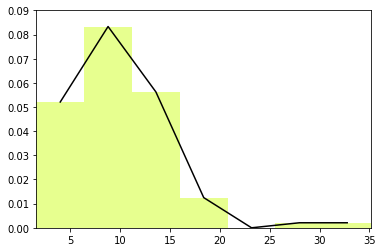

In [23]:
plt.hist(data, 
         bins = np.arange(min_member, max_member + 1, interval_length),
         density = True, 
         range = (min_member, max_member), 
         color = "#E7FF8F")
plt.plot(hist_center, hist_hight, color = "black")
plt.ylim(0.00, 0.09)
plt.xlim(min_member, max_member)

In [24]:
# выборочное среднее и выборочная дисперсия

In [25]:
sample_mean = np.mean(data)
print(sample_mean)

9.969940000000001


In [28]:
sample_variance_shift = np.var(data) #смещённая дисперсия
print(sample_variance_shift)

25.9183433764


In [29]:
sum = 0
for i in data:
    sum += (i - sample_mean) ** 2
sample_variance = sum / (len(data) - 1) #несмещённая дисперсия
print(sample_variance)

26.180144824646455


In [30]:
# возможный закон распределения

In [31]:

## по виду полученной гистограммы можно предположить,
## что распределение эмпирических частот
## представляет из себя гамма-распределение


In [32]:
## математическое ожидание для гамма-распределения: a * b
## дисперсия для гамма-распределения: a * b ^ 2
## => a * b = sample_mean
## => a * b ^ 2 = sample_variance
## 1 / b = sample_mean / sample_variance => b = sample_variance / sample_mean
## a = sample_mean / b => a = (sample_mean ^ 2) / sample_variance

In [33]:
a = (sample_mean ** 2) / sample_variance
b = sample_variance / sample_mean
print ("a = %5.2f" % a, "    b = %5.2f" % b)

a =  3.80     b =  2.63


In [34]:
# график гамма-распределения с полученными параметрами

In [35]:
x_1 = np.linspace (min_member, max_member, 100) 
y_1 = gamma.pdf(x_1, a = a, scale = b)

(1.572, 35.182)

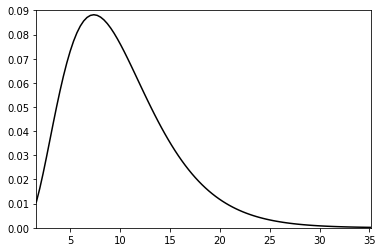

In [36]:
plt.plot(x_1, y_1, color = "black")
plt.ylim(0.00, 0.09)
plt.xlim(min_member, max_member)

In [37]:
# совместный график

(1.572, 35.182)

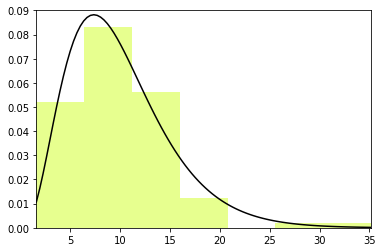

In [38]:
plt.plot(x_1, y_1, color = "black")
plt.hist(data, 
         bins = np.arange(min_member, max_member + 1, interval_length),
         density = True, 
         range = (min_member, max_member), 
         color = "#E7FF8F")
plt.ylim(0.00, 0.09)
plt.xlim(min_member, max_member)

In [39]:
# построение эмпирической функции распределения

In [40]:
arf = [0] * (n + 1)
sum = 0.0
for i in range (0, n + 1):
    arf[i] = sum
    print(arf[i])
    if arf[i] == 1: break
    sum += rel_frequency[i]

0.0
0.25
0.65
0.92
0.98
0.98
0.99
1.0


(1.572, 35.182)

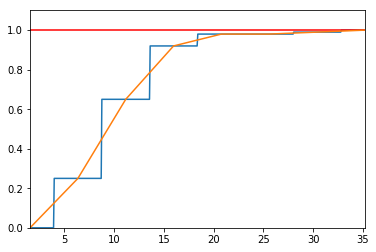

In [41]:
def s_similar(z):
    if z < hist_center[0]:
        return arf[0]
    elif hist_center[0] <= z < hist_center[1]:
        return arf[1]
    elif hist_center[1] <= z < hist_center[2]:
        return arf[2]
    elif hist_center[2] <= z < hist_center[3]:
        return arf[3]
    elif hist_center[3] <= z < hist_center[4]:
        return arf[4]
    elif hist_center[4] <= z < hist_center[5]:
        return arf[5]
    elif hist_center[5] <= z < hist_center[6]:
        return arf[6]
    elif hist_center[6] <= z:
        return arf[7]
    
x_2 = np.linspace(min_member, max_member, 500)
y_2 = np.vectorize(s_similar, otypes=[float])
x_3 = np.linspace(min_member, max_member, 8)
graph = plt.plot(x_2, y_2(x_2))
plt.axhline(y = 1, color = 'r')
plt.plot(x_3, arf)
plt.ylim(0.0, 1.1)
plt.xlim(min_member, max_member)

In [42]:
# вывод: первоначальная обработка позволяет предварительно отнести выборку к гамма-распределению
# с параметрами a = 3.80, b = 2.63